# 勉強会用 DEAPを用いた特徴量生成
参考ドキュメント：解説。全体通してこのリンク読むだけで良いかも
* https://qiita.com/overlap/items/e7f1077ef8239f454602

In [37]:
import operator, math, random, time
import numpy as np

from deap import algorithms, base, creator, tools, gp

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, log_loss

import matplotlib.pyplot as plt
from tqdm import tqdm

In [38]:
# サンプルデータの生成
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=8, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [39]:
# ベースラインスコアの算出
clf = LogisticRegression(solver='lbfgs',penalty="l2", C=1.0)#solver='lbfgs',
base_train_auc = np.mean(cross_val_score(clf, X_train, y_train, scoring="roc_auc", cv=5))
clf.fit(X_train, y_train)
base_test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

# 除算関数の定義
# 左項 / 右項で右項が0の場合1を代入する
def protectedDiv(left, right):
    eps = 1.0e-7
    tmp = np.zeros(len(left))
    tmp[np.abs(right) >= eps] = left[np.abs(right) >= eps] / right[np.abs(right) >= eps]
    tmp[np.abs(right) < eps] = 1.0
    return tmp


# 乱数シード
random.seed(123)

# 適合度を最大化するような木構造を個体として定義
creator.create("FitnessMax_1", base.Fitness, weights=(1.0,))
creator.create("Individual_1", gp.PrimitiveTree, fitness=creator.FitnessMax)

# 初期値の計算
# 学習データの5-fold CVのAUCスコアを評価指標の初期値とする
n_features = X_train.shape[1]
clf = LogisticRegression(solver='lbfgs',penalty="l2", C=1.0)#solver='lbfgs',
prev_auc = np.mean(cross_val_score(clf, X_train, y_train, scoring="roc_auc", cv=5))
prev_auc

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax_1' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual_1' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


0.7411977732089553

In [40]:
# メインループ
# resultsに特徴量数、学習データのAUCスコア（5-fold CV）、テストデータのAUCスコアを保持する
# exprsに生成された特徴量の表記を保持する
results = []
exprs = []












  0%|          | 0/10 [00:00<?, ?it/s]/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


   	      	                                 fitness                                 	                      size                     
   	      	-------------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max     	min     	nevals	std      	avg    	gen	max	min	nevals	std    
0  	300   	0.740652	0  	0.752432	0.548263	300   	0.0111655	4.52667	0  	14 	2  	300   	2.84182
1  	162   	0.742505	1  	0.759497	0.740432	162   	0.00261726	4.33333	1  	14 	1  	162   	2.58629
2  	172   	0.745288	2  	0.768911	0.740665	172   	0.00475849	4.62667	2  	14 	1  	172   	3.03545
3  	171   	0.749873	3  	0.782677	0.740551	171   	0.0073224 	5.79333	3  	18 	1  	171   	4.01214
4  	158   	0.75723 	4  	0.782677	0.740451	158   	0.0106457 	10.8467	4  	19 	1  	158   	4.06733













 10%|█         | 1/10 [01:08<10:15, 68.42s/it]

5  	169   	0.764728	5  	0.792389	0.740792	169   	0.0136314 	12.8933	5  	20 	4  	169   	2.99031
11 0.7923889318709723 0.7936109050607388 0.7877816884489717 68.40323781967163


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


   	      	                             fitness                              	                      size                     
   	      	------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max    	min     	nevals	std       	avg    	gen	max	min	nevals	std    
0  	300   	0.792526	0  	0.80731	0.791867	300   	0.00103384	4.18333	0  	14 	2  	300   	2.50793


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1  	181   	0.793291	1  	0.80731	0.791874	181   	0.00172474	4.05333	1  	15 	1  	181   	2.37427


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


2  	165   	0.795615	2  	0.80731	0.791974	165   	0.0030211 	3.80333	2  	16 	1  	165   	1.90035
3  	160   	0.799222	3  	0.80731	0.792113	160   	0.00531307	3.49   	3  	12 	1  	160   	1.17043


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


4  	151   	0.803532	4  	0.80731	0.792042	151   	0.00600619	3.20333	4  	9  	1  	151   	0.845767













 20%|██        | 2/10 [02:27<09:33, 71.65s/it]

5  	169   	0.802818	5  	0.80731	0.792072	169   	0.0064276 	3.16   	5  	8  	1  	169   	0.74458 
12 0.807309724454746 0.8085560364925418 0.8055198523287846 79.15507817268372


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

   	      	                                 fitness                                 	                      size                     
   	      	-------------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max     	min     	nevals	std      	avg    	gen	max	min	nevals	std    
0  	300   	0.806586	0  	0.812537	0.557278	300   	0.0144336	4.08333	0  	15 	2  	300   	2.39508


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

1  	163   	0.808158	1  	0.814809	0.806589	163   	0.00134071	4.02333	1  	12 	2  	163   	2.14074
2  	157   	0.809629	2  	0.815481	0.806844	157   	0.00210874	4.10667	2  	14 	1  	157   	2.18981
3  	164   	0.810844	3  	0.825099	0.806872	164   	0.00277617	4.38667	3  	16 	1  	164   	2.32031


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


4  	184   	0.81167 	4  	0.825099	0.80673 	184   	0.00377209	5.82   	4  	12 	1  	184   	2.16663


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)











 30%|███       | 3/10 [03:53<08:50, 75.84s/it]

5  	165   	0.813889	5  	0.825099	0.806918	165   	0.00508127	6.97333	5  	14 	1  	165   	1.86886
13 0.8250990452854952 0.8260583384648001 0.8224081459414441 85.5698630809784


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

   	      	                                 fitness                                 	                      size                     
   	      	-------------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max     	min     	nevals	std      	avg    	gen	max	min	nevals	std    
0  	300   	0.823206	0  	0.828084	0.512399	300   	0.0227025	4.21667	0  	15 	2  	300   	2.67015


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

1  	172   	0.825528	1  	0.83005 	0.824432	172   	0.000835936	4.27333	1  	12 	1  	172   	2.2238 


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


2  	148   	0.826501	2  	0.83005 	0.824584	148   	0.00136929 	3.83   	2  	8  	1  	148   	1.61692


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


3  	179   	0.827661	3  	0.830931	0.82465 	179   	0.00176364 	3.82667	3  	8  	1  	179   	1.25298


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


4  	162   	0.82822 	4  	0.833839	0.824304	162   	0.00217095 	4.86333	4  	14 	1  	162   	1.64661













 40%|████      | 4/10 [05:36<08:24, 84.15s/it]

5  	161   	0.828778	5  	0.833862	0.824304	161   	0.00255344 	6.04   	5  	12 	1  	161   	1.46915
14 0.8338619907520586 0.8349106499749614 0.827686551028253 103.51363706588745


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


   	      	                         fitness                         	                      size                     
   	      	---------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max     	min   	nevals	std      	avg    	gen	max	min	nevals	std    
0  	300   	0.83245	0  	0.837302	0.4885	300   	0.0201287	4.31333	0  	15 	2  	300   	2.61441


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

1  	174   	0.833032	1  	0.837576	0.532158	174   	0.0175401	3.9    	1  	10 	1  	174   	2.00749


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

2  	149   	0.834894	2  	0.83799 	0.832764	149   	0.00126481	3.66   	2  	10 	1  	149   	1.43448


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


3  	169   	0.836223	3  	0.841921	0.833579	169   	0.00170126	4.9    	3  	12 	1  	169   	1.42009


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

4  	149   	0.836793	4  	0.841921	0.833451	149   	0.00202794	5.35667	4  	11 	1  	149   	1.31509


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

5  	157   	0.837779	5  	0.841921	0.833473	157   	0.00279279	6.39   	5  	12 	2  	157   	1.46671
15 0.8419206509064521 0.8429330514214226 0.8343934188609137 126.79712009429932


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

   	      	                             fitness                              	                      size                     
   	      	------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max    	min     	nevals	std       	avg    	gen	max	min	nevals	std    
0  	300   	0.841679	0  	0.84309	0.797242	300   	0.00284588	4.06333	0  	14 	2  	300   	2.54283


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

1  	160   	0.841727	1  	0.843105	0.732564	160   	0.00632521	4.27   	1  	16 	1  	160   	2.7971 


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

2  	155   	0.842425	2  	0.843204	0.841463	155   	0.000419096	4.01667	2  	13 	1  	155   	2.12518


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

3  	176   	0.842565	3  	0.843579	0.841588	176   	0.000522458	4.37667	3  	11 	1  	176   	2.0416 


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


4  	151   	0.842911	4  	0.847444	0.841224	151   	0.000743601	5.85   	4  	17 	1  	151   	2.99569


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

5  	177   	0.843531	5  	0.847446	0.841432	177   	0.00123222 	6.92333	5  	15 	3  	177   	2.8759 
16 0.8474463000372359 0.8485232876089015 0.839750904926645 118.81185793876648


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

   	      	                             fitness                             	                      size                     
   	      	-----------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max     	min     	nevals	std      	avg 	gen	max	min	nevals	std    
0  	300   	0.84367	0  	0.848742	0.508925	300   	0.0319464	4.23	0  	14 	2  	300   	2.73199


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

1  	165   	0.84766	1  	0.848829	0.846398	165   	0.00040929	4.65667	1  	17 	1  	165   	2.59078


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

2  	157   	0.848005	2  	0.849988	0.846411	157   	0.000580332	4.80333	2  	17 	1  	157   	2.26377


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

3  	174   	0.848048	3  	0.849989	0.810036	174   	0.00230677 	5.07333	3  	11 	1  	174   	1.29921


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

4  	174   	0.848334	4  	0.850141	0.816824	174   	0.00198093 	5.96333	4  	11 	1  	174   	1.52599


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

5  	173   	0.848937	5  	0.851503	0.844579	173   	0.00101685 	6.96   	5  	12 	1  	173   	1.67682
17 0.8515031017977085 0.8527537163445156 0.8438641168556602 133.4476010799408


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

   	      	                             fitness                              	                      size                     
   	      	------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max     	min     	nevals	std       	avg    	gen	max	min	nevals	std    
0  	300   	0.85116	0  	0.852898	0.793268	300   	0.00349934	4.26667	0  	14 	2  	300   	2.63734


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1  	164   	0.851688	1  	0.852918	0.849021	164   	0.000471126	4.29333	1  	16 	1  	164   	2.72041


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

2  	175   	0.852016	2  	0.853131	0.812999	175   	0.00288431 	3.64333	2  	12 	1  	175   	2.07913
3  	161   	0.852718	3  	0.853131	0.851181	161   	0.000484672	3.15   	3  	11 	1  	161   	1.43556
4  	170   	0.852689	4  	0.853131	0.851054	170   	0.000546655	3.91   	4  	12 	1  	170   	1.94814













 80%|████████  | 8/10 [14:16<04:01, 120.85s/it]

5  	159   	0.852607	5  	0.853158	0.851248	159   	0.000664505	5.75333	5  	11 	1  	159   	2.39148
18 0.8531578217087828 0.8544539131778318 0.8440953536421295 140.27015566825867


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

   	      	                                 fitness                                 	                      size                     
   	      	-------------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max     	min     	nevals	std      	avg    	gen	max	min	nevals	std    
0  	300   	0.852248	0  	0.854491	0.665259	300   	0.0112939	3.96667	0  	15 	2  	300   	2.42189


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1  	154   	0.853394	1  	0.854494	0.852402	154   	0.000393159	4.17667	1  	11 	1  	154   	2.10368


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

2  	177   	0.853848	2  	0.855248	0.850024	177   	0.000638348	4.43   	2  	13 	1  	177   	2.46003


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

3  	147   	0.854292	3  	0.856636	0.852838	147   	0.000709412	4.52333	3  	12 	1  	147   	2.30712


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

4  	169   	0.854424	4  	0.856636	0.852657	169   	0.000942811	5.88333	4  	12 	1  	169   	2.16865


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)











 90%|█████████ | 9/10 [16:53<02:11, 131.71s/it]

5  	179   	0.854628	5  	0.856652	0.852773	179   	0.000943582	7.23   	5  	11 	1  	179   	2.12691
19 0.8566515670766414 0.8580161261813312 0.8485529181882248 157.01246118545532


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

   	      	                                 fitness                                 	                      size                     
   	      	-------------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max     	min     	nevals	std      	avg    	gen	max	min	nevals	std    
0  	300   	0.854946	0  	0.858025	0.516901	300   	0.0198538	4.15333	0  	14 	2  	300   	2.55666


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

1  	173   	0.856027	1  	0.858025	0.648864	173   	0.0119904	4.14333	1  	15 	1  	173   	2.43231


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

2  	156   	0.856898	2  	0.858212	0.809419	156   	0.00279945	3.75333	2  	17 	1  	156   	1.84549


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

3  	185   	0.857448	3  	0.858212	0.856153	185   	0.00064074	3.62   	3  	9  	1  	185   	1.42206


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

4  	158   	0.857756	4  	0.858212	0.856087	158   	0.000571875	3.07   	4  	9  	1  	158   	1.66886


/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Shimpei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: C

5  	170   	0.857633	5  	0.858212	0.855946	170   	0.000675648	4.82   	5  	10 	1  	170   	2.23329
20 0.8582116002843865 0.859513564448098 0.8515499871868794 168.82124304771423

### Results
Baseline AUC train : 0.7411977732089553
Baseline AUC test : 0.7311977464924082
Best AUC train : 0.8582116002843865
Best AUC test : 0.8515499871868794

### Generated feature expression
mul(sub(add(mul(ARG9, ARG2), cos(neg(ARG6))), neg(ARG6)), sub(ARG7, sin(ARG9)))
mul(ARG8, ARG2)
mul(add(ARG8, ARG11), add(ARG2, ARG6))
mul(sub(ARG6, ARG7), neg(mul(ARG8, ARG8)))
sub(mul(ARG2, ARG7), mul(ARG11, ARG7))
sub(mul(add(ARG7, sin(ARG8)), ARG6), sub(ARG2, ARG2))
sub(mul(ARG2, ARG11), neg(mul(ARG2, sub(ARG9, ARG7))))
neg(mul(cos(ARG8), sub(cos(ARG16), ARG6)))
sub(sin(add(ARG8, ARG9)), sin(sin(ARG11)))
sin(sub(ARG2, protectedDiv(ARG9, ARG6)))


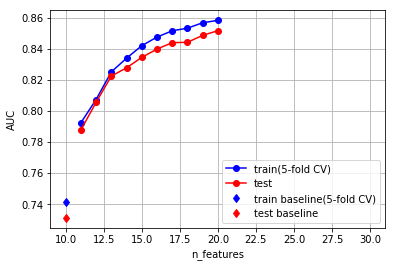

In [41]:
for i in tqdm(range(10)):

    # 構文木として利用可能な演算の定義
    pset = gp.PrimitiveSet("MAIN", n_features)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(protectedDiv, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(np.cos, 1)
    pset.addPrimitive(np.sin, 1)
    pset.addPrimitive(np.tan, 1)

    # 関数のデフォルト値の設定
    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)

    # 評価関数の設定
    # 新しく生成した変数を元の変数に加えて5-fold CVを求める
    def eval_genfeat(individual):
        func = toolbox.compile(expr=individual)
        features_train = [X_train[:,i] for i in range(n_features)]
        new_feat_train = func(*features_train)
        X_train_tmp = np.c_[X_train, new_feat_train]
        return np.mean(cross_val_score(clf, X_train_tmp, y_train, scoring="roc_auc", cv=5)),

    # 評価、選択、交叉、突然変異の設定
    # 選択はサイズ10のトーナメント方式、交叉は1点交叉、突然変異は深さ2のランダム構文木生成と定義
    toolbox.register("evaluate", eval_genfeat)
    toolbox.register("select", tools.selTournament, tournsize=10)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    # 構文木の制約の設定
    # 交叉や突然変異で深さ5以上の木ができないようにする
    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=5))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=5)) 

    # 世代ごとの個体とベスト解を保持するクラスの生成
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    # 統計量の表示設定
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)    

    
    
    
    # 進化の実行
    # 交叉確率50%、突然変異確率10%、3世代まで進化
    start_time = time.time()
    pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 5, stats=mstats, halloffame=hof, verbose=True)
    end_time = time.time()

    # ベスト解とAUCの保持
    best_expr = hof[0]
    best_auc = mstats.compile(pop)["fitness"]["max"]

    # 5-fold CVのAUCスコアが前ステップのAUCを超えていた場合
    # 生成変数を学習、テストデータに追加し、ベストAUCを更新する
    if prev_auc < best_auc:
        # 生成変数の追加
        func = toolbox.compile(expr=best_expr)
        features_train = [X_train[:,i] for i in range(n_features)]
        features_test = [X_test[:,i] for i in range(n_features)]
        new_feat_train = func(*features_train)
        new_feat_test = func(*features_test)
        X_train = np.c_[X_train, new_feat_train]
        X_test = np.c_[X_test, new_feat_test]

        ### テストAUCの計算（プロット用）
        clf.fit(X_train, y_train)
        train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
        test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

        # ベストAUCの更新と特徴量数の加算
        prev_auc = best_auc
        n_features += 1

        # 表示と出力用データの保持
        print(n_features, best_auc, train_auc, test_auc, end_time - start_time)
        results.append([n_features, best_auc, train_auc, test_auc])
        exprs.append(best_expr)

        # 変数追加後の特徴量数が10を超えた場合break
        if n_features >= 25:
            break

# 結果の出力
print()
print("### Results")
print("Baseline AUC train :", base_train_auc)
print("Baseline AUC test :", base_test_auc)
print("Best AUC train :", results[-1][1])
print("Best AUC test :", results[-1][3])

# 結果のプロット
res = np.array(results)
plt.plot(res[:,0], res[:,1],"o-", color="b", label="train(5-fold CV)")
plt.plot(res[:,0], res[:,3],"o-", color="r", label="test")
plt.plot(10, base_train_auc, "d", color="b", label = "train baseline(5-fold CV)")
plt.plot(10, base_test_auc, "d", color="r", label = "test baseline")
plt.xlim(9,31)
plt.grid(which="both")
plt.xlabel('n_features')
plt.ylabel('AUC')
plt.legend(loc="lower right")
plt.savefig("gp_featgen.png")

# 生成した構文木の出力
print()
print("### Generated feature expression")
for expr in exprs:
    print(expr)